### Ce petit notebook illustre la méthode de McCabe Thiele sur un système binaire idéal. On y trace la courbe d'équilibre liquide-vapeur, les lignes d'opérations, la ligne q et les plateaux. Le système est assez simple mais il vous sera assurément utile de regarder les détails afin de mieux comprendre les relations développées au début du chapitre 7 de Seader. N'hésitez pas à modifier les paramètres afin de mieux 'sentir' les relations existant entre les différents paramètres d'opération de cette colonne.

### Vous verrez que les graphes sont tracés morceau par morceau, en commentant les autres parties du graphe.

In [1]:
# Initialiser l'affichage
#
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline

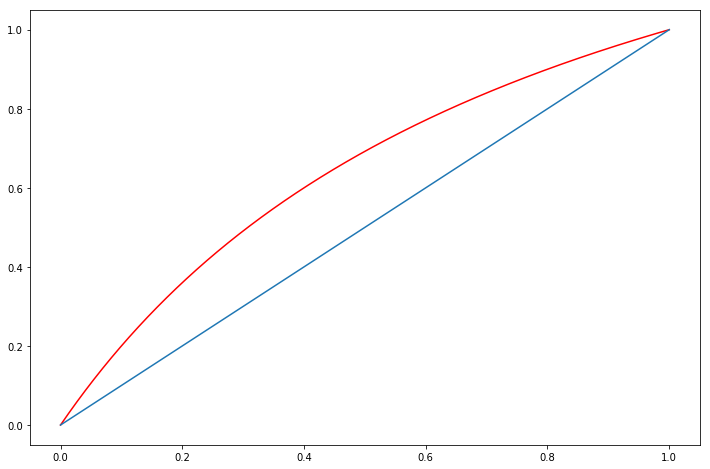

In [2]:
# Équilibre mélange idéal
#
def equilib(x):
    alpha=2.25
    return y-alpha*x/(1+(alpha-1)*x)

n=10001
dx=1/(n-1)
ye=np.zeros(n)
xe=np.zeros(n)
for i in range(0,n):
    y=dx*i
    ye[i]=dx*i
    xe[i]=fsolve(equilib,0.5)
# 0.9 et 0.1 comme fractions du produit au haut et au bas de la colonne
xd=0.9
xb=0.1
# Tracer
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r');
plt.plot([0,1],[0,1]);
#plt.plot([xd,xi],[xd,yi]);
#plt.plot([zf,xi],[zf,yi])
#plt.plot([xb,xi],[xb,yi])

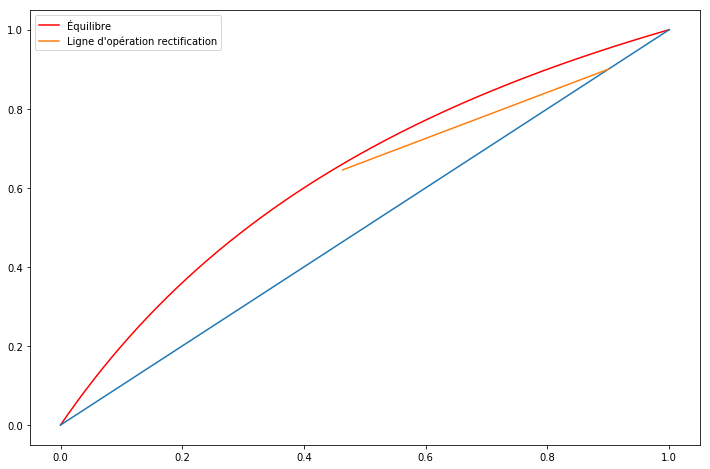

In [3]:
zf=0.5  # alimentation à 0.5
# Reflux 
R=1.4
# Alimentation, qualité=0.8
q=0.8
# Calculer la ligne d'opération 'rectifying, fonction de R, le 'reflux ratio'
yi=(zf+xd*q/R)/(1+q/R)
xi=(-(q-1)*(1-R/(R+1))*xd-zf)/((q-1)*R/(R+1)-q)
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r',label='Équilibre')
plt.plot([0,1],[0,1])
plt.plot([xd,xi],[xd,yi],label="Ligne d'opération rectification");     # relie le point D au point calculé sur la ligne d'opération stripping
plt.legend();
#plt.plot([zf,xi],[zf,yi])
#plt.plot([xb,xi],[xb,yi])

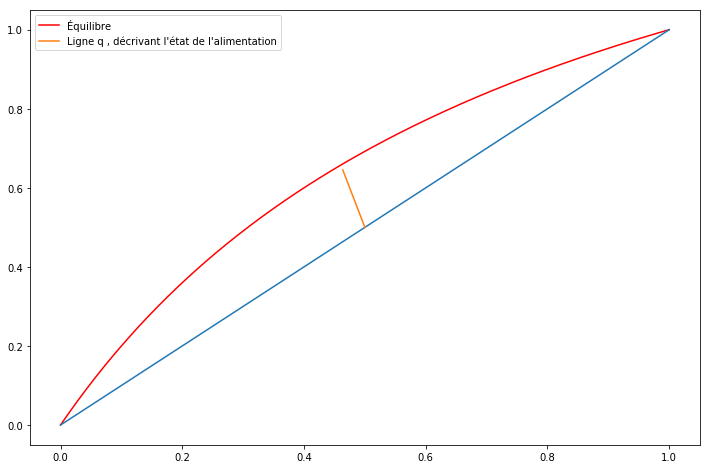

In [4]:
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r',label='Équilibre')
plt.plot([0,1],[0,1])
#plt.plot([xd,xi],[xd,yi])
plt.plot([zf,xi],[zf,yi],label="Ligne q , décrivant l'état de l'alimentation");
plt.legend();
#plt.plot([xb,xi],[xb,yi])

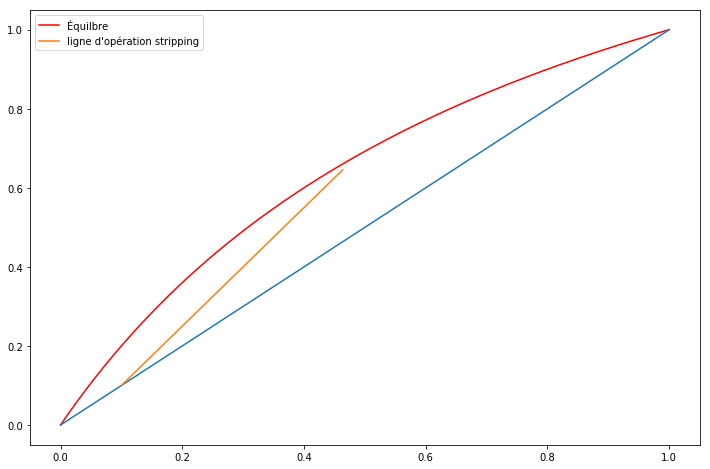

In [5]:
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r',label="Équilbre")
plt.plot([0,1],[0,1])
#plt.plot([xd,xi],[xd,yi])
#plt.plot([zf,xi],[zf,yi])
plt.plot([xb,xi],[xb,yi],label="ligne d'opération stripping"); # La droite de la zone tripping est trouvée en reliant les deux points
plt.legend();

nombre de plateaux dans la zone de rectification 7


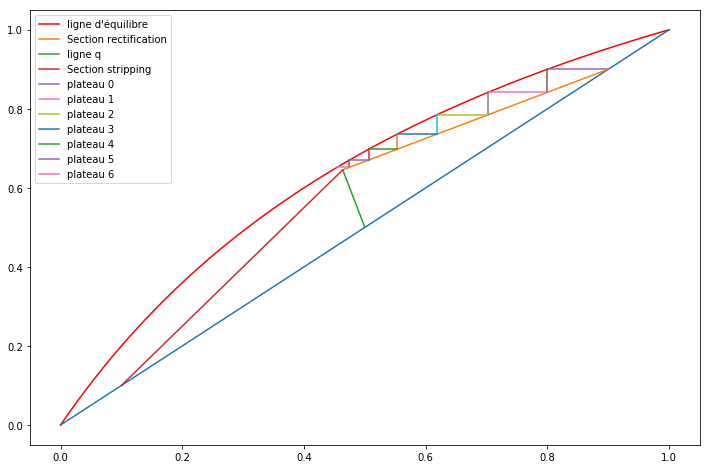

In [6]:
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r',label="ligne d'équilibre")
plt.plot([0,1],[0,1])
plt.plot([xd,xi],[xd,yi],label="Section rectification")
plt.plot([zf,xi],[zf,yi],label='ligne q')
plt.plot([xb,xi],[xb,yi],label="Section stripping")

# tracer les plateaux théoriques
xp=np.zeros(n)
yp=np.zeros(n)
i=0
xp[0]=xd
yp[0]=xd
y=xd
# rectification
while xp[i]>xi:
    xp[i+1]=fsolve(equilib,0.5);
    yp[i+1]=R/(R+1)*xp[i+1]+xd/(R+1);
    y=yp[i+1];
    plt.plot([xp[i], xp[i+1]],[yp[i], yp[i]],label="plateau "+str(i))
    if xp[i+1]>xi:
        plt.plot([xp[i+1], xp[i+1]],[yp[i], yp[i+1]])
    i=i+1
print('nombre de plateaux dans la zone de rectification',i)
plt.legend();

nombre de plateaux dans la zone de stripping 7


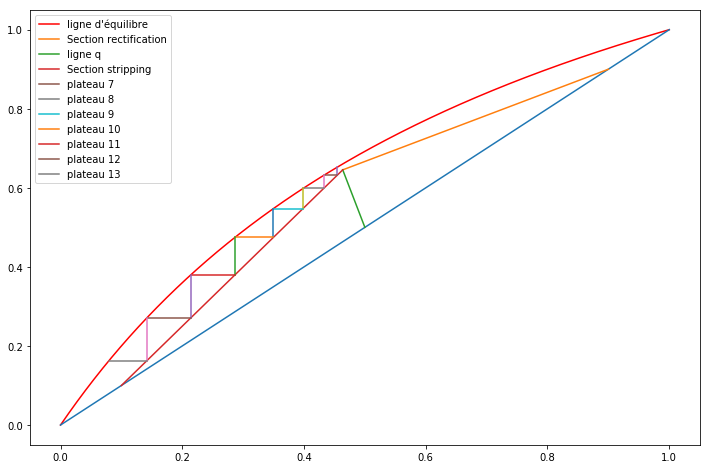

In [7]:
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r',label="ligne d'équilibre")
plt.plot([0,1],[0,1])
plt.plot([xd,xi],[xd,yi],label="Section rectification")
plt.plot([zf,xi],[zf,yi],label='ligne q')
plt.plot([xb,xi],[xb,yi],label="Section stripping")
# Stripping
SS=(yi-xb)/(xi-xb)
yp[i]=SS*(xp[i]-xb)+xb
y=yp[i]
plt.plot([xp[i] ,xp[i]],[yp[i-1] ,yp[i]])
ni=i
while xp[i]>xb:
    xp[i+1]=fsolve(equilib,0.5)
    yp[i+1]=SS*(xp[i+1]-xb)+xb
    y=yp[i+1]
    plt.plot([xp[i], xp[i+1]],[yp[i], yp[i]],label="plateau "+str(i))
    if xp[i+1]>xb:
        plt.plot([xp[i+1], xp[i+1]],[yp[i], yp[i+1]])
    i=i+1
print('nombre de plateaux dans la zone de stripping',(i-ni))
plt.legend();

## Voici le résultat final, on reprend tout:

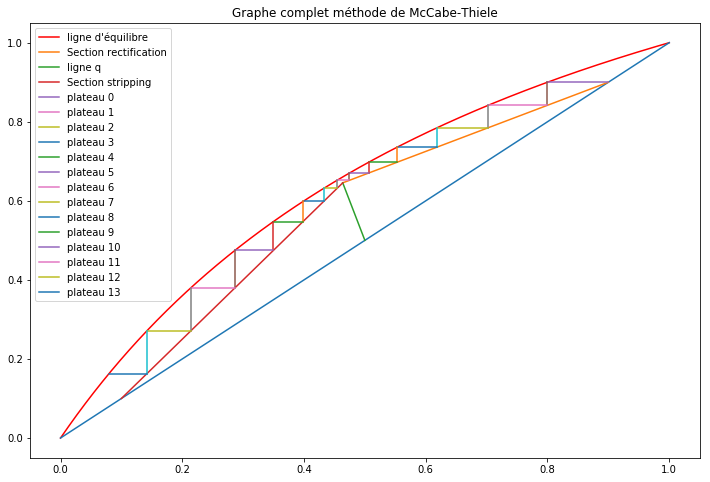

In [8]:
plt.figure(figsize = (12,8))
plt.plot(xe,ye,'r',label="ligne d'équilibre")
plt.plot([0,1],[0,1])
plt.plot([xd,xi],[xd,yi],label="Section rectification")
plt.plot([zf,xi],[zf,yi],label='ligne q')
plt.plot([xb,xi],[xb,yi],label="Section stripping")

# tracer les plateaux théoriques
xp=np.zeros(n)
yp=np.zeros(n)
i=0
xp[0]=xd
yp[0]=xd
y=xd
# rectification
while xp[i]>xi:
    xp[i+1]=fsolve(equilib,0.5);
    yp[i+1]=R/(R+1)*xp[i+1]+xd/(R+1);
    y=yp[i+1];
    plt.plot([xp[i], xp[i+1]],[yp[i], yp[i]],label="plateau "+str(i))
    if xp[i+1]>xi:
        plt.plot([xp[i+1], xp[i+1]],[yp[i], yp[i+1]])
    i=i+1
# Stripping
SS=(yi-xb)/(xi-xb)
yp[i]=SS*(xp[i]-xb)+xb
y=yp[i]
plt.plot([xp[i] ,xp[i]],[yp[i-1] ,yp[i]])
while xp[i]>xb:
    xp[i+1]=fsolve(equilib,0.5)
    yp[i+1]=SS*(xp[i+1]-xb)+xb
    y=yp[i+1]
    plt.plot([xp[i], xp[i+1]],[yp[i], yp[i]],label="plateau "+str(i))
    if xp[i+1]>xb:
        plt.plot([xp[i+1], xp[i+1]],[yp[i], yp[i+1]])
    i=i+1
plt.legend();
plt.title('Graphe complet méthode de McCabe-Thiele');